<a href="https://colab.research.google.com/github/MohanaThanmai/Visualization-tool-for-electric-vehicle-charge-and-range/blob/main/college_placement_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**setup and load data**



In [1]:
# Install necessary packages (if not already installed)
!pip install plotly --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plot style
sns.set(style="whitegrid")

# Upload and load dataset
from google.colab import files
uploaded = files.upload()

# Assuming your uploaded file is named 'college_placement.csv'
df = pd.read_csv(next(iter(uploaded)))  # Automatically takes uploaded file
df.head()



Saving college_student_placement_dataset.csv to college_student_placement_dataset (1).csv


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


**Data preprocessing**

In [4]:
# Overview of data
print(df.shape)
print(df.info())
display(df.describe())

# Check missing values
print("\nMissing values:\n", df.isnull().sum())

# Encode 'Placement' column (if it's not already encoded)
if df['Placement'].dtype == 'object':
    df['Placement_Encoded'] = df['Placement'].map({'Yes': 1, 'No': 0})

(10000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
 10  Placement_Encoded       0 non-null      float64
dtypes: float64(3), int64(5), object(3)
memory usage: 859.5+ KB
None


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement_Encoded
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,0.0
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400,NaN
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959,NaN
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000,NaN
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000,NaN
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000,NaN
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000,NaN
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000,NaN



Missing values:
 College_ID                    0
IQ                            0
Prev_Sem_Result               0
CGPA                          0
Academic_Performance          0
Internship_Experience         0
Extra_Curricular_Score        0
Communication_Skills          0
Projects_Completed            0
Placement                     0
Placement_Encoded         10000
dtype: int64


**EDA Exploratory design analysis**

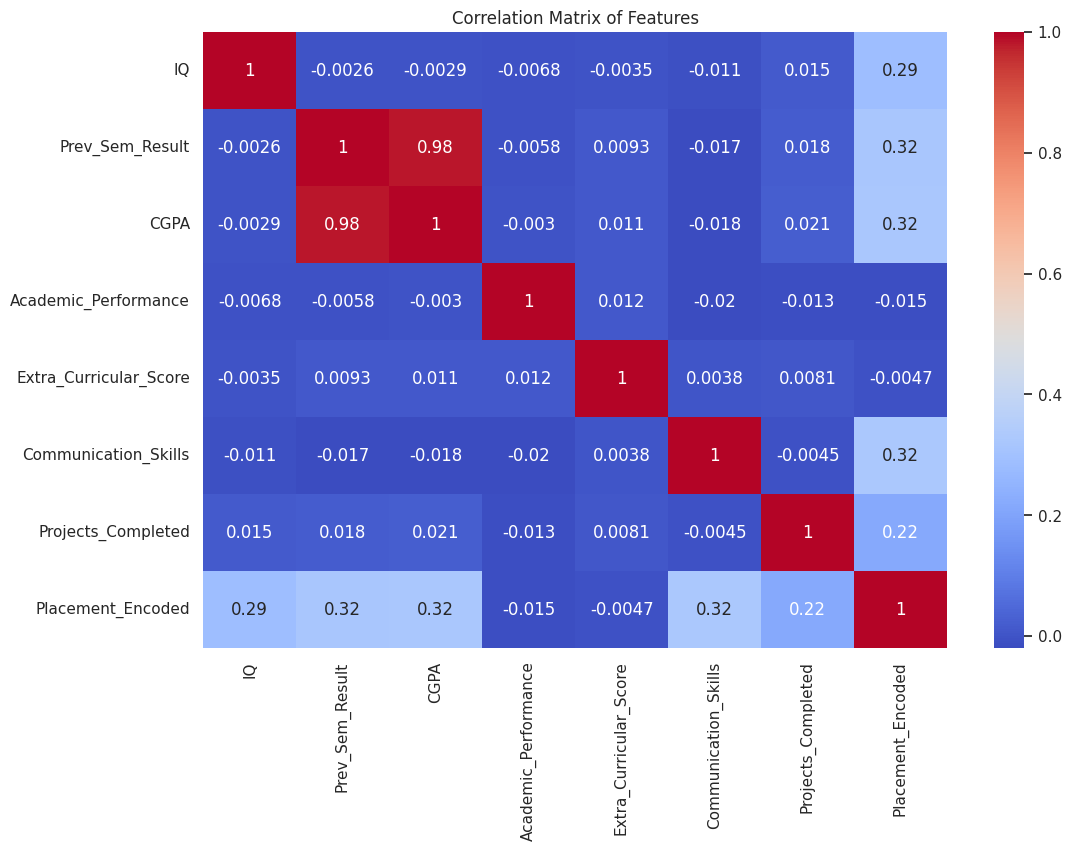

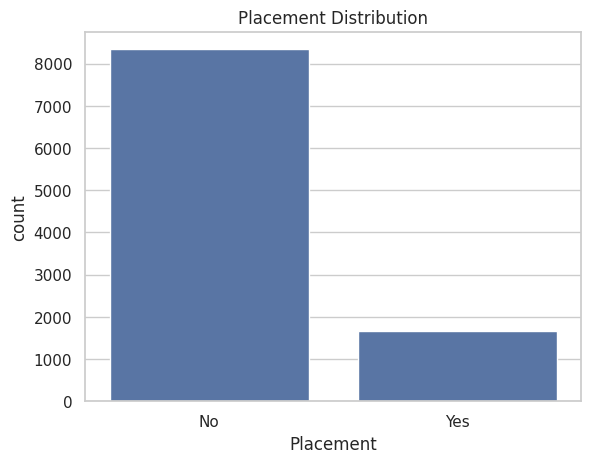

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement_Encoded
Placement,,,,,,,,
No,97.552452,7.330462,7.321527,5.565520,4.977581,5.143748,2.346961,0.0
Yes,109.121760,8.567420,8.592483,5.450271,4.937312,7.663653,3.350211,1.0


In [5]:
# Drop non-numeric columns for correlation matrix
df_numeric = df.drop(columns=['College_ID', 'Internship_Experience', 'Placement'])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Placement distribution
sns.countplot(x='Placement', data=df)
plt.title('Placement Distribution')
plt.show()

# Statistical summary grouped by placement
display(df.groupby('Placement').mean(numeric_only=True))

**Placement vs CGPA**

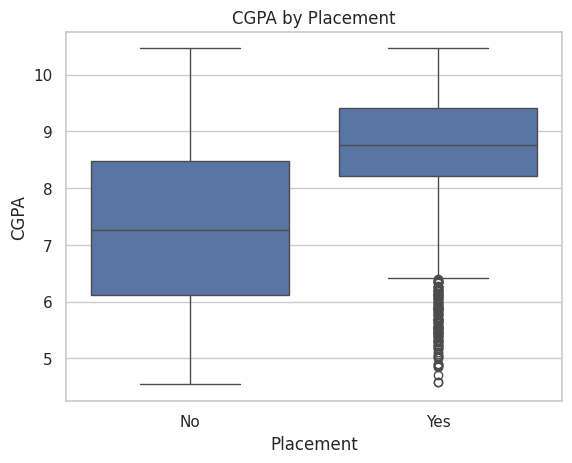

In [7]:
sns.boxplot(data=df, x='Placement', y='CGPA')
plt.title('CGPA by Placement')
plt.show()


**Internship_Experience vs Placement Rate**

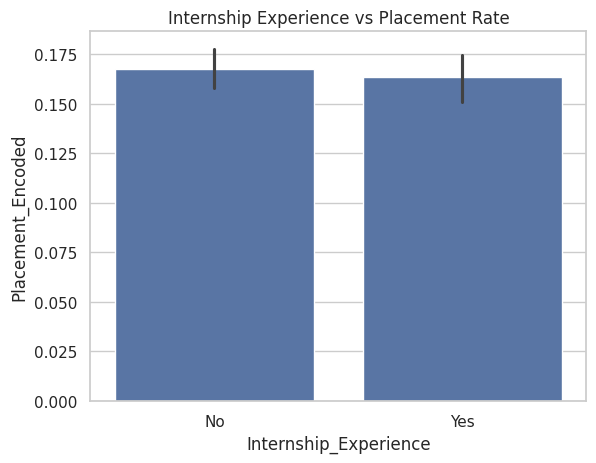

In [8]:
sns.barplot(data=df, x='Internship_Experience', y='Placement_Encoded')
plt.title('Internship Experience vs Placement Rate')
plt.show()


**Placement vs Projects_Completed**

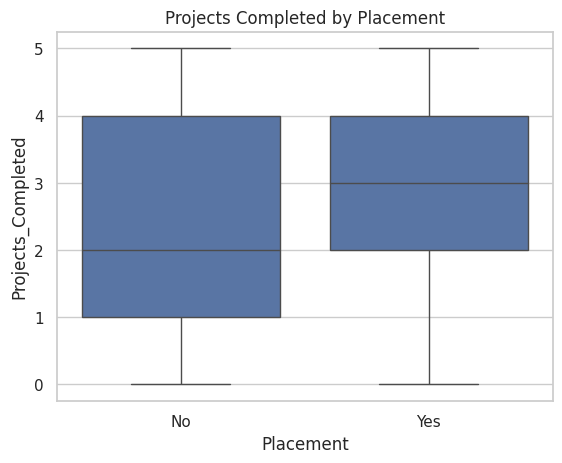

In [9]:
sns.boxplot(data=df, x='Placement', y='Projects_Completed')
plt.title('Projects Completed by Placement')
plt.show()


**Interactive part ( IQ vs CGPA)**

In [10]:
fig = px.scatter(df, x='CGPA', y='IQ', color='Placement',
                 size='Projects_Completed', hover_data=[
                     'Internship_Experience', 'Communication_Skills'
                 ])
fig.update_layout(title='IQ vs CGPA Colored by Placement')
fig.show()


**Insights**

In [11]:
insights = {
    "Insight 1": "Higher CGPA generally correlates with higher placement chances.",
    "Insight 2": "Students with more internship experience tend to have better placement outcomes.",
    "Insight 3": "More completed projects are often linked with successful placement.",
    "Insight 4": "Communication skills impact placement, especially in borderline CGPA/IQ cases.",
    "Insight 5": "IQ alone doesn’t ensure placement—practical experience matters more."
}

for k, v in insights.items():
    print(f"{k}: {v}")


Insight 1: Higher CGPA generally correlates with higher placement chances.
Insight 2: Students with more internship experience tend to have better placement outcomes.
Insight 3: More completed projects are often linked with successful placement.
Insight 4: Communication skills impact placement, especially in borderline CGPA/IQ cases.
Insight 5: IQ alone doesn’t ensure placement—practical experience matters more.


**Optional filters**

In [12]:
# Filtered interactive bar chart
fig = px.histogram(df, x="Internship_Experience", color="Placement",
                   barmode="group", title="Internship Experience vs Placement")
fig.show()

# Filterable bubble chart
fig = px.scatter(df, x="CGPA", y="IQ", color="Placement",
                 size="Extra_Curricular_Score",
                 hover_data=["Communication_Skills", "Projects_Completed"])
fig.update_layout(title="Bubble Plot: CGPA vs IQ by Placement")
fig.show()


**Processed data saving**

In [13]:
# Save preprocessed dataset for ML or other analysis
df.to_csv("processed_college_placement.csv", index=False)
files.download("processed_college_placement.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>